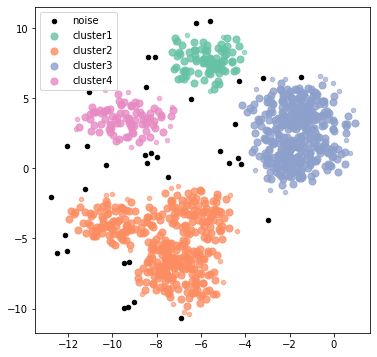

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

seed = 1
X, _ = make_blobs(n_samples=1000, centers=10, n_features=2, random_state=seed)

mod = DBSCAN(eps=0.7, min_samples=5).fit(X)


core_samples_mask = np.zeros_like(mod.labels_, dtype=bool)
core_samples_mask[mod.core_sample_indices_] = True # 标记核心点
labels = mod.labels_
unique_labels = np.unique(labels)
n_labels = len(set(labels))
n_clusters = n_labels - (1 if -1 in unique_labels else 0) # 判断是否有噪点
n_noise = list(labels).count(-1)


# colors_list = [cm.rainbow(i) for i in np.linspace(0, 1, n_labels)]
# colors_list = [cm.Set1(i) for i in np.arange(n_labels)]
colors_list = [cm.Set2(i) for i in np.arange(n_labels)] #################################################
fig, ax = plt.subplots(figsize=(6, 6))

xy = X[labels == -1, :] # 噪声点
ax.scatter(xy[:, 0], xy[:, 1], c='black', marker='o', s=20, label='noise')
for j in range(n_clusters):
    xy = X[(labels == j) & core_samples_mask, :] # 核心点
    ax.scatter(xy[:, 0], xy[:, 1], color=colors_list[j], label=f'cluster{j+1}', alpha=0.8, s=50)
    xy = X[(labels == j) & ~core_samples_mask, :] # 边界点
    ax.scatter(xy[:, 0], xy[:, 1], color=colors_list[j], alpha=0.6, s=20)
ax.legend(loc='best')
plt.show()

- c=可以指定单个颜色，可以指定颜色序列
- matplotlib.cm中的颜色用`(i)`获取RGBA数组
- 有序列型，连续型，离散型等色卡

In [2]:
plt.colormaps() # 查看所有的cmap配色

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

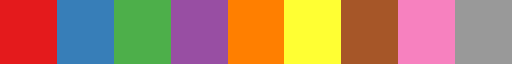

In [3]:
cm.Set1

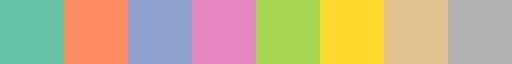

In [4]:
cm.Set2

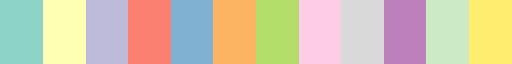

In [5]:
cm.Set3

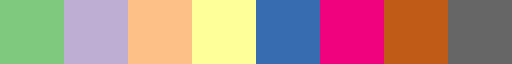

In [6]:
cm.Accent

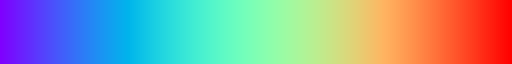

In [7]:
cm.rainbow

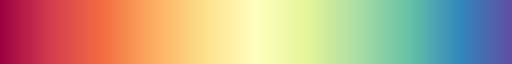

In [8]:
cm.Spectral

In [9]:
n = 6
[cm.Spectral(i) for i in np.linspace(0, 1, n)] # 生成需要的颜色序列（均匀分布）

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.9568627450980393, 0.42745098039215684, 0.2627450980392157, 1.0),
 (0.996078431372549, 0.8784313725490196, 0.5450980392156862, 1.0),
 (0.9019607843137256, 0.9607843137254902, 0.5960784313725491, 1.0),
 (0.4, 0.7607843137254902, 0.6470588235294118, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

In [10]:
[cm.Set1(i) for i in np.arange(n)] # 生成需要的颜色序列（有限个）

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745, 1.0),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804, 1.0),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726, 1.0),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098, 1.0),
 (1.0, 0.4980392156862745, 0.0, 1.0),
 (1.0, 1.0, 0.2, 1.0)]